In [153]:
import numpy as np
import pandas as pd

In [155]:
df = pd.read_csv("new.csv")

In [157]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [159]:
df.shape

(2240, 29)

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## DATA CLEANING

In [163]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [166]:
df.dropna(inplace=True)

In [167]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [168]:
df.shape

(2216, 29)

In [170]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [171]:
for i in df.columns:
    if df[i].nunique() == 1:
        df.drop(columns=i,axis=1,inplace=True)

In [172]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [173]:
df.drop(columns=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],axis=1,inplace=True)  

In [174]:
parts = df['Dt_Customer'].str.split("-",n=3,expand=True)
df['Day'] = parts[0].astype('int')
df['Month'] = parts[1].astype('int')
df['Year'] = parts[2].astype('int')

In [175]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Day,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,0,19,1,2014


In [177]:
df.drop(columns=['Dt_Customer'],axis=1,inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int64 

## DATA VISUALISATION

In [181]:
floats = []
ints = []
objects = []
for i in df.columns:
    if df[i].dtype == object:
        objects.append(i)
    elif df[i].dtype == int:
        ints.append(i)
    else:
        floats.append(i)
print(objects)
print(ints)
print(floats)

['Education', 'Marital_Status']
['Day', 'Month', 'Year']
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']


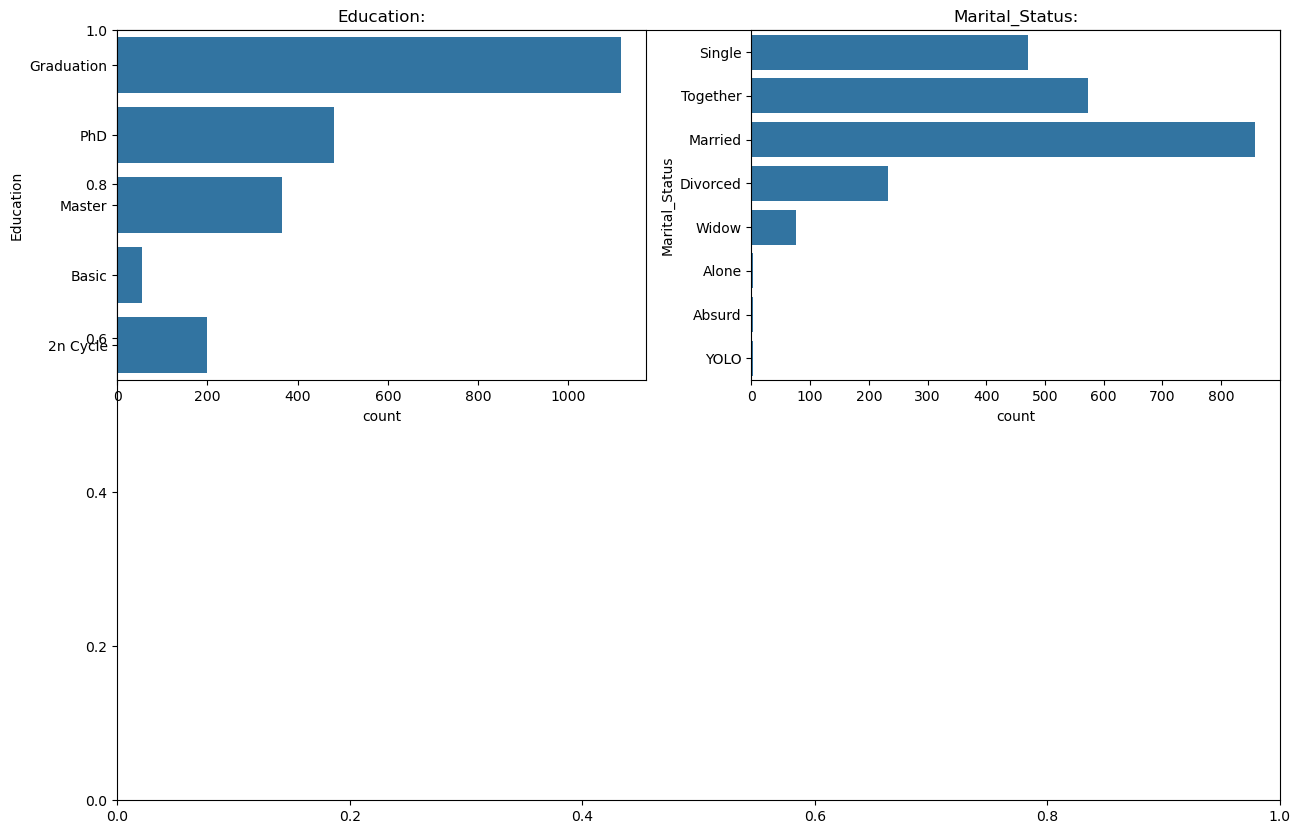

In [182]:
plt.subplots(figsize=(15,10))
for i, col in enumerate(objects):
    plt.subplot(2,2,i+1)
    sns.countplot(df[col])
    plt.title(f'{col}:')
plt.show()

In [184]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

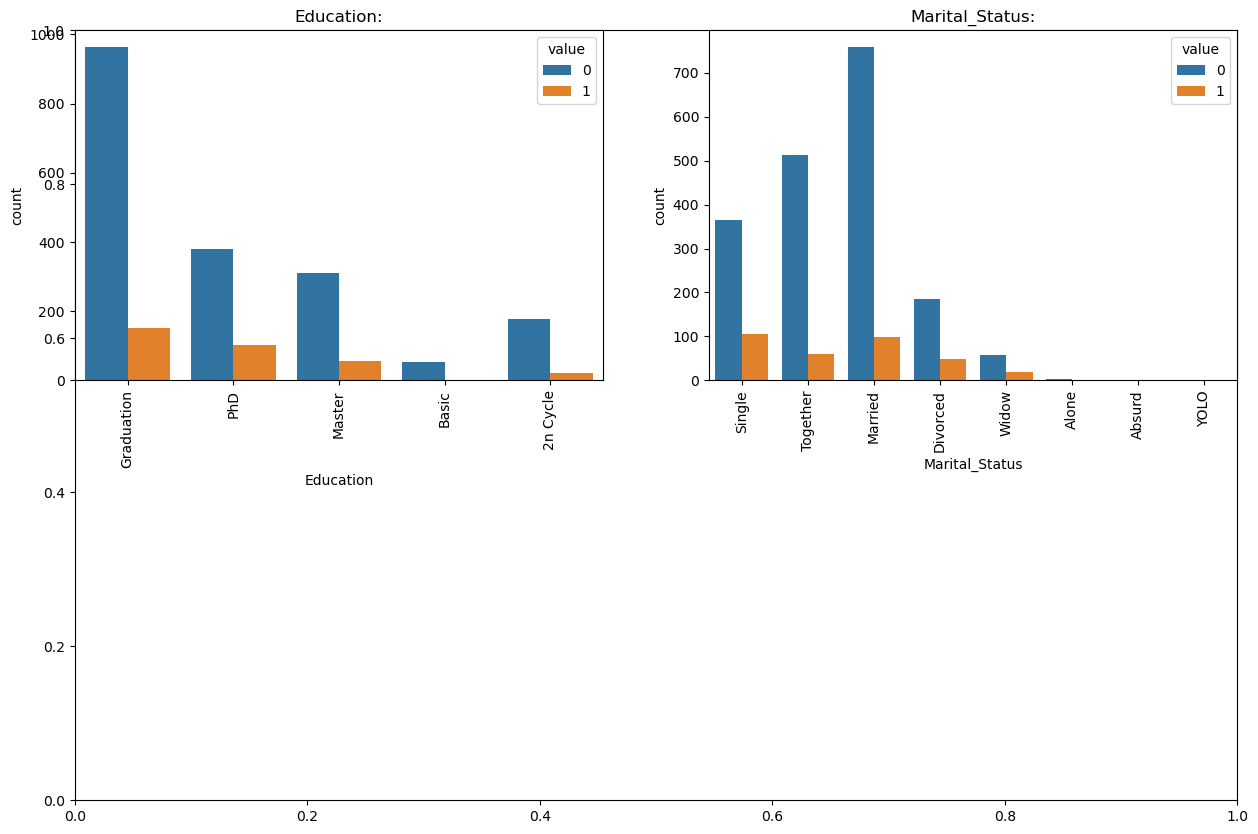

In [185]:
plt.subplots(figsize=(15,10))
for i, col in enumerate(objects):
    plt.subplot(2,2,i+1)
    df_melted = df.melt(id_vars=[col],value_vars=['Response'],var_name='hue')
    sns.countplot(x=col,hue='value',data=df_melted)
    plt.xticks(rotation='vertical')
    plt.title(f'{col}:')
plt.show()

In [186]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if df[i].dtype == object:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])

In [187]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Day,Month,Year
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,3,8,10,4,7,0,1,4,9,2012
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,2,1,1,2,5,0,0,8,3,2014
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,1,8,2,10,4,0,0,21,8,2013
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,2,2,0,4,6,0,0,10,2,2014
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,5,5,3,6,5,0,0,19,1,2014


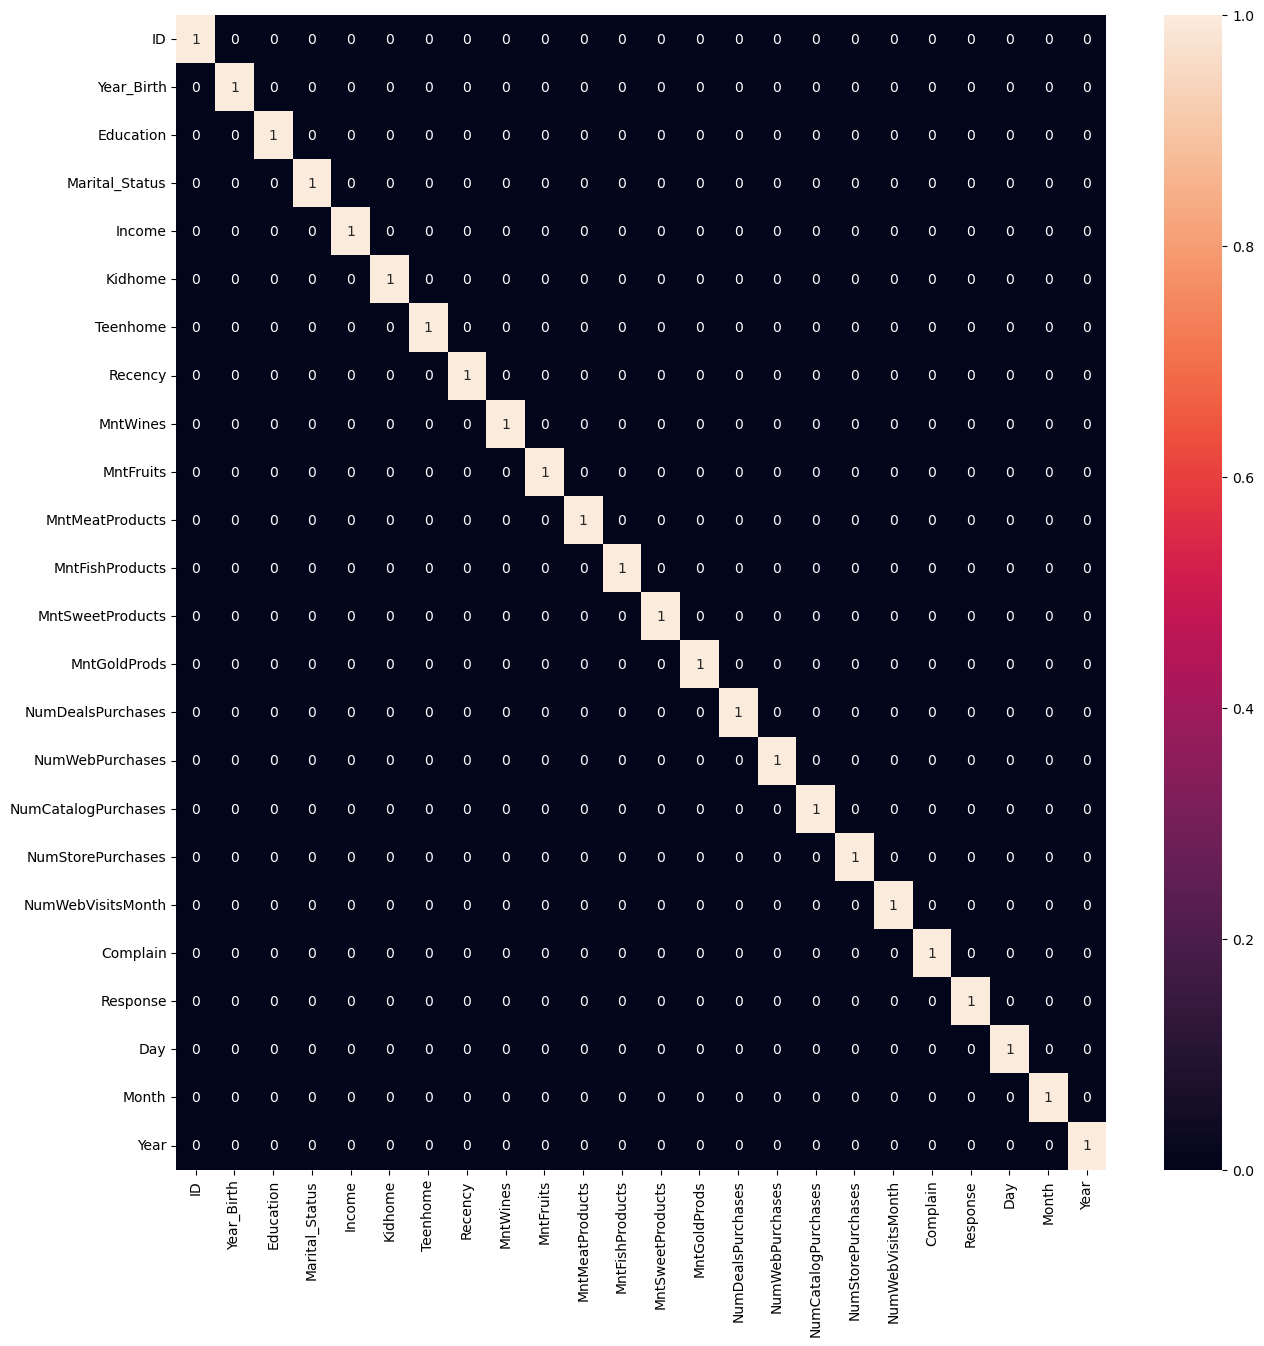

In [201]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr() > 0.8,annot=True)
plt.show()

In [203]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

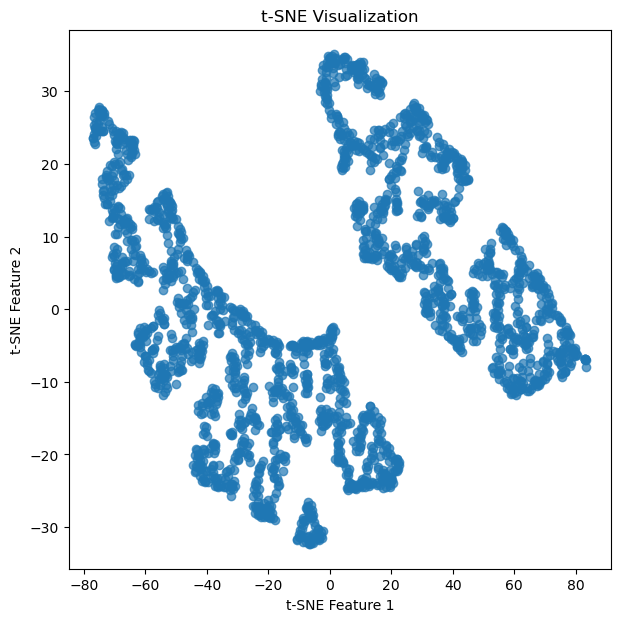

In [278]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization')
plt.show()


## KMeans

In [280]:
inertia_score = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,max_iter=100,random_state=22,)
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)


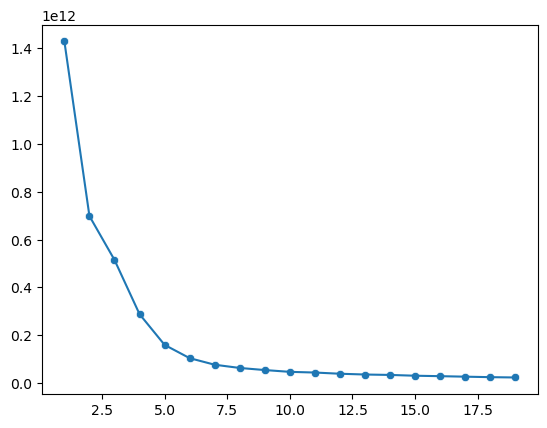

In [281]:
plt.plot(range(1,20),inertia_score)
sns.scatterplot(x=range(1,20),y=inertia_score)
plt.show()

K = 6 is the optimum number of clusters that should be made

In [283]:
kmeans = KMeans(n_clusters=5,max_iter=100,random_state=22,)
segments = kmeans.fit_predict(df)

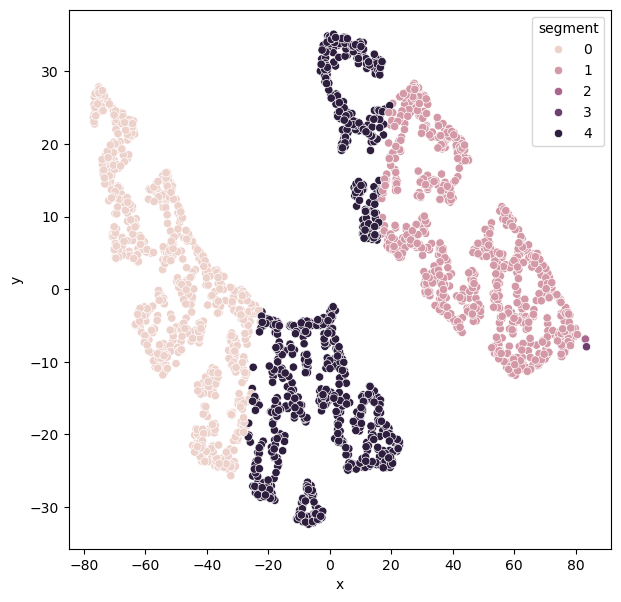

<Figure size 640x480 with 0 Axes>

In [292]:
plt.figure(figsize=(7, 7))
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()
plt.savefig('Clustering.png')